In [ ]:
# Install necessary libraries in case not available
# !pip install requests pandas numpy matplotlib seaborn

**Import Necessary Python Libraries**

In [ ]:
# Libraries for URL and File handle
import requests
import pandas as pd
from io import StringIO
import os
# Libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:

In [ ]:
# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Get the CSV content from the URL
response = requests.get(url)
response.raise_for_status()  # Raises error for bad responses

# Read CSV content into a DataFrame
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data)

# Save the DataFrame to a CSV file in the current directory
output_file = "StackOverflow Survey Data 2024.csv"
df.to_csv(output_file, index=False)

print(f"CSV file saved to: {os.path.abspath(output_file)}")


### Data Wrangling

In [ ]:
# Read the CSV file
df = pd.read_csv("StackOverflow Survey Data 2024.csv")

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Retrieve the top 10 most used/want to study programming languages/database applications

In [ ]:
def data_top(df, column_name):
    """ Generates a DataFrame displaying the top 10 most commonly used or most desired programming languages or database applications, based on the specified column.
    Parameters:
    df (DataFrame): The input DataFrame containing survey or usage data.
    column_name (str): The name of the column to analyze (e.g., "LanguageHaveWorkedWith", "DatabaseWantToWorkWith").

    Returns:
    DataFrame: A DataFrame containing the top 10 technologies and their corresponding counts or percentages. 
    """
    tech_set = set()
    for i in df[column_name]:
        tech_set.update(list(map(str.strip, i.split(';'))))

    # Count respondents for each database applications
    tech_count = dict.fromkeys(tech_set, 0)
    for i in df[column_name]:
        for db in list(map(str.strip, i.split(';'))):
            tech_count[db] += 1

    # Get top 10
    tech_top = sorted(tech_count.items(), key=lambda x: x[1], reverse=True)[0:10]
    return pd.DataFrame(
        {'Technology': [i[0] for i in tech_top],
        'Number of Respondents': [i[1] for i in tech_top]}
    )

### Data visualization

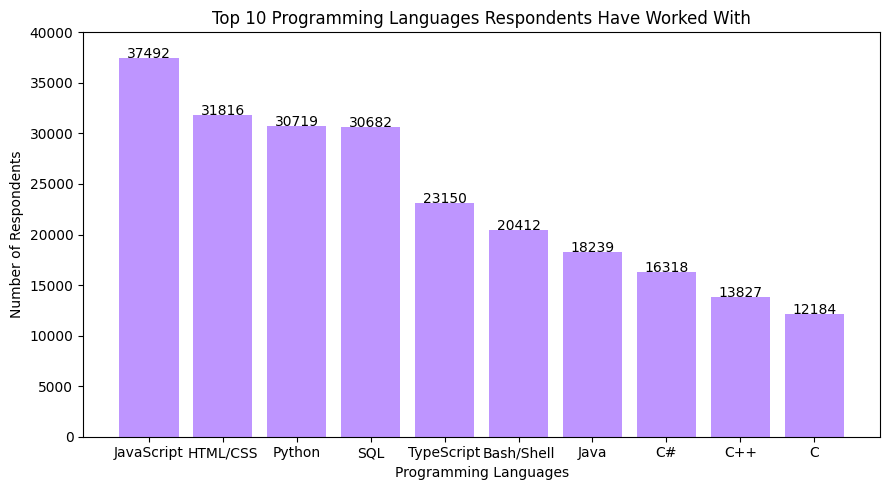

In [ ]:
# Count respondents for top 10 language have worked with
lang_worked = df.loc[df['LanguageHaveWorkedWith'].notnull(), ['LanguageHaveWorkedWith']]
lang_worked_modified = data_top(lang_worked, 'LanguageHaveWorkedWith')
lang_worked_modified.loc[
    lang_worked_modified['Technology'] == 'Bash/Shell (all shells)', 'Technology'
] = 'Bash/Shell'

# Plot the figure
plt.figure(figsize=(9, 5))
bars = plt.bar(data=lang_worked_modified, height='Number of Respondents', x='Technology', color='#BE95FF')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', color='black')

plt.title('Top 10 Programming Languages Respondents Have Worked With')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.ylim(0,40000)
plt.tight_layout()
plt.show()


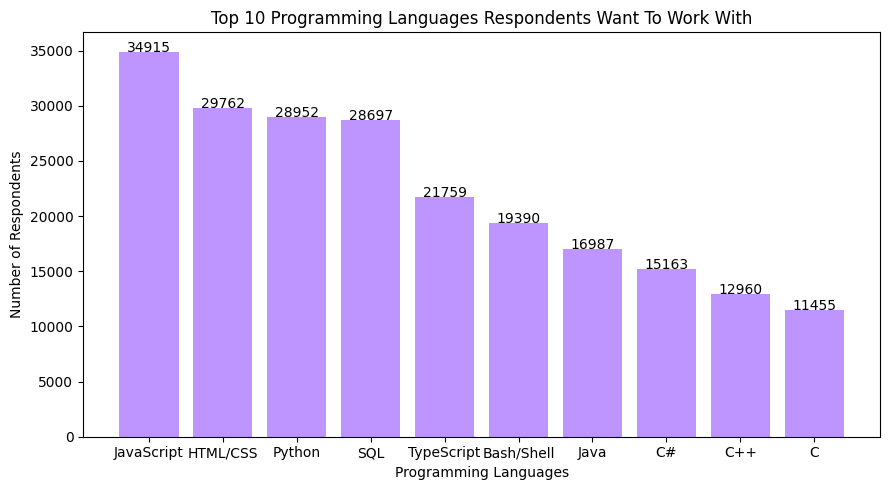

In [ ]:
# Count respondents for top 10 language want to work with
lang_wanted = df.loc[df['LanguageWantToWorkWith'].notnull(), ['LanguageHaveWorkedWith']]
lang_wanted_modified = data_top(lang_wanted, 'LanguageHaveWorkedWith')
lang_wanted_modified.loc[
    lang_wanted_modified['Technology'] == 'Bash/Shell (all shells)', 'Technology'
] = 'Bash/Shell'

# Plot the figure
plt.figure(figsize=(9, 5))
bars = plt.bar(data=lang_wanted_modified, height='Number of Respondents', x='Technology', color='#BE95FF')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', color='black')

plt.title('Top 10 Programming Languages Respondents Want To Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


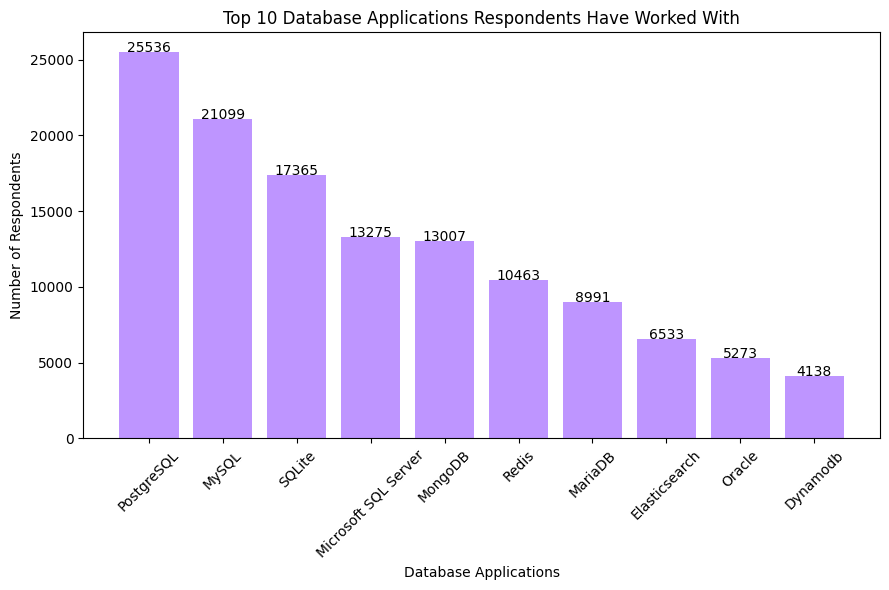

In [ ]:
# Count respondents for top 10 database have worked with
db_worked = df.loc[df['DatabaseHaveWorkedWith'].notnull(), ['DatabaseHaveWorkedWith']]
db_worked_modified = data_top(db_worked, 'DatabaseHaveWorkedWith')

# Plot the figure
plt.figure(figsize=(9, 6))
bars = plt.bar(data=db_worked_modified, height='Number of Respondents', x='Technology', color='#BE95FF')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', color='black')

plt.title('Top 10 Database Applications Respondents Have Worked With')
plt.xlabel('Database Applications')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


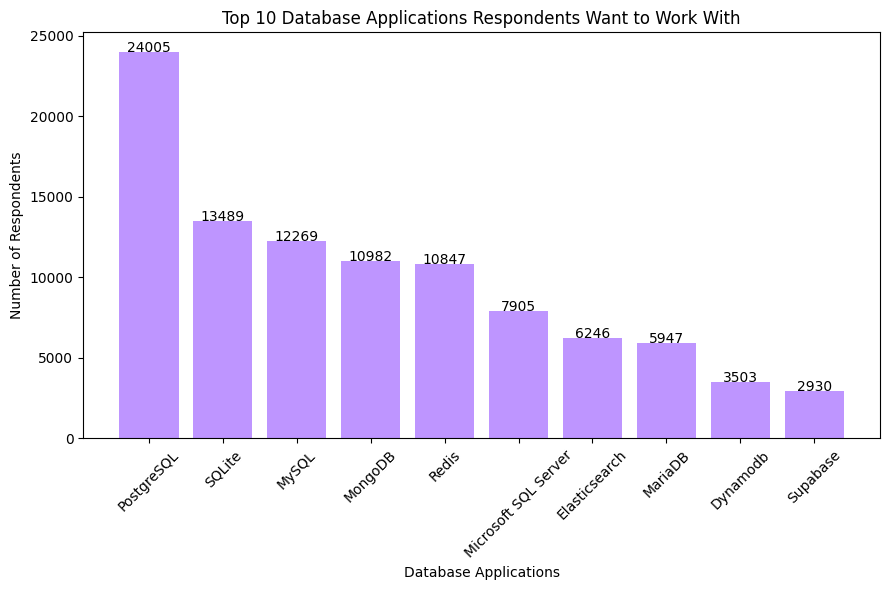

In [ ]:
# Count respondents for top 10 database want to work with
db_wanted = df.loc[df['DatabaseWantToWorkWith'].notnull(), ['DatabaseWantToWorkWith']]
db_wanted_modified = data_top(db_wanted, 'DatabaseWantToWorkWith')

# Plot the figure
plt.figure(figsize=(9, 6))
bars = plt.bar(data=db_wanted_modified, height='Number of Respondents', x='Technology', color='#BE95FF')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', color='black')

plt.title('Top 10 Database Applications Respondents Want to Work With')
plt.xlabel('Database Applications')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
